In [83]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [84]:
X, y = load_iris(return_X_y=True)

In [85]:
# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [86]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

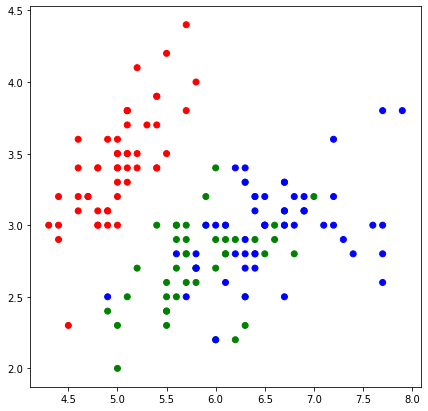

In [87]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [88]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [89]:
def knn(x_train, y_train, x_test, k, weights='uniform', a=0.01):

    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        # добавляем вес по номеру сосоеда w(i)=1i ;w(i)=1(i+a)b
        # и по расстоянию до сосоеда w(d)=1(d+a)b
        if weights=='number':
            for d in sorted(test_distances)[0:k]:
                for i in range(k):
                    classes[d[1]] += 1/(i+1)
                    
        if weights=='distance':
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1/(d[1] + a)**2
        else: 
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [90]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [91]:
k = 1

y_pred = knn(X_train, y_train, X_test, k, weights='uniform')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


In [92]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

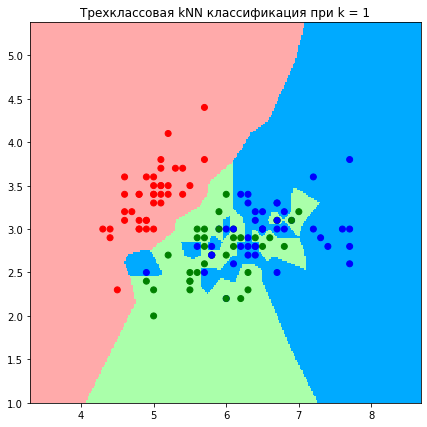

In [64]:
get_graph(X_train, y_train, k)

In [105]:
K_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

Точность алгоритма при k = 2: 0.667


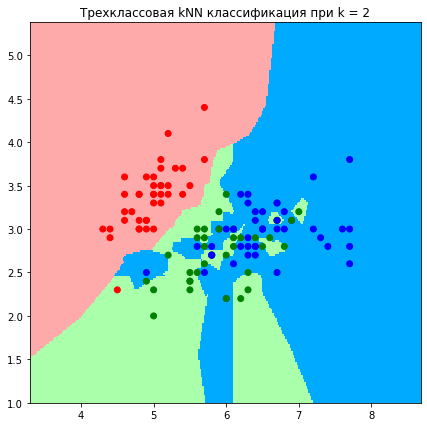

Точность алгоритма при k = 3: 0.733


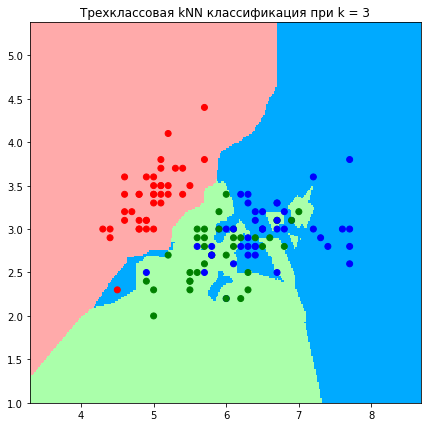

Точность алгоритма при k = 4: 0.833


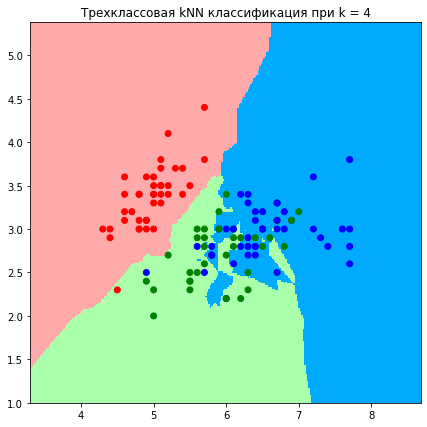

Точность алгоритма при k = 5: 0.867


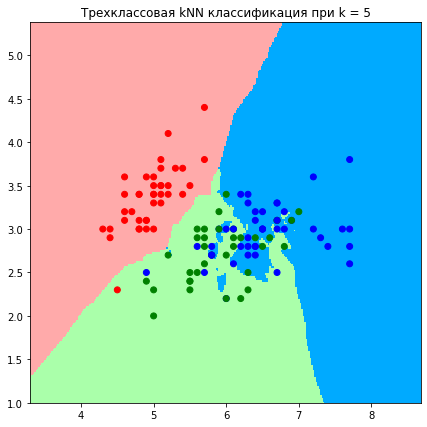

Точность алгоритма при k = 6: 0.833


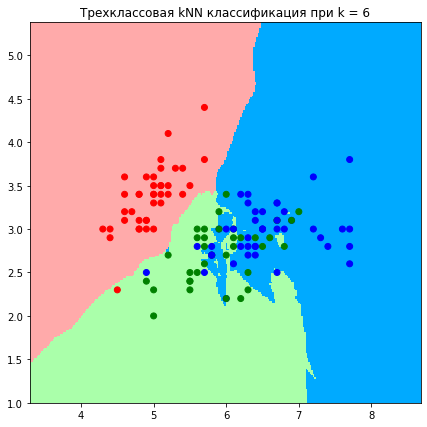

Точность алгоритма при k = 7: 0.800


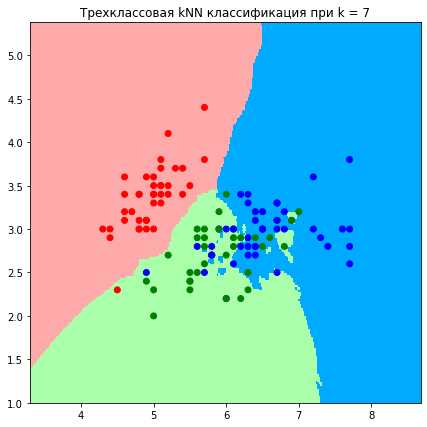

Точность алгоритма при k = 8: 0.800


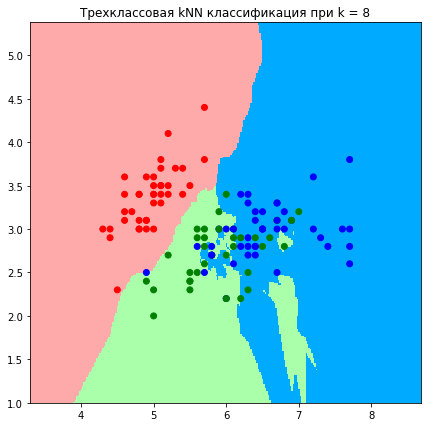

Точность алгоритма при k = 9: 0.867


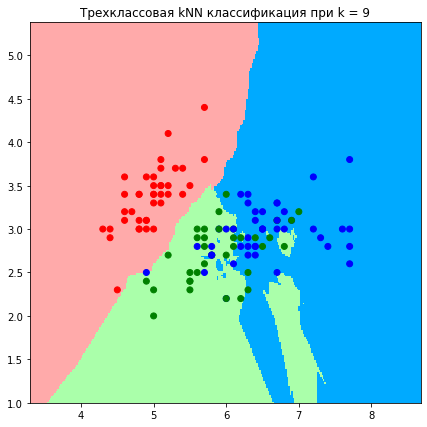

Точность алгоритма при k = 10: 0.833


In [ ]:
for i in K_list:
    k = i
    y_pred = knn(X_train, y_train, X_test, k, weights='uniform')
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
    get_graph(X_train, y_train, k)

In [107]:
for i in K_list:
    k = i
    y_pred = knn(X_train, y_train, X_test, k, weights='number')
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
    #get_graph(X_train, y_train, k) не стала строить плоскости

Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.833
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 8: 0.800
Точность алгоритма при k = 9: 0.867
Точность алгоритма при k = 10: 0.833


In [113]:
for i in K_list:
    k = i
    y_pred = knn(X_train, y_train, X_test, k, weights='distance', a=0.01)
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
    #get_graph(X_train, y_train, k) не стала строить плоскости

Точность алгоритма при k = 2: 0.700
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.767
Точность алгоритма при k = 5: 0.733
Точность алгоритма при k = 6: 0.767
Точность алгоритма при k = 7: 0.767
Точность алгоритма при k = 8: 0.767
Точность алгоритма при k = 9: 0.767
Точность алгоритма при k = 10: 0.733


Делаем вывод: Добавление весов соседям не дало значительного улучшения модели.Модель с весом по расстоянию показала более слабый результат. Наилушим можно считать результат при колчестве соседей равным 5. При этом можно использовать как модель с весом по номеру соседа, так и без него. Возможно имеено для такого набора данных модедь с весами не показала лучшего результата.